In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from hfn import *
import os

In [2]:
images = []
for filename in os.listdir("sample/colour/clean"):
    images.append(Image.open(f"sample/colour/clean/{filename}").convert('L'))
hopfield = HopfieldComplex(images[0].size)

for i in images:
    k = np.array(i).flatten()
    bits = np.pi * (k / 255)
    states = np.exp(1j * bits)
    hopfield.train_network(states)

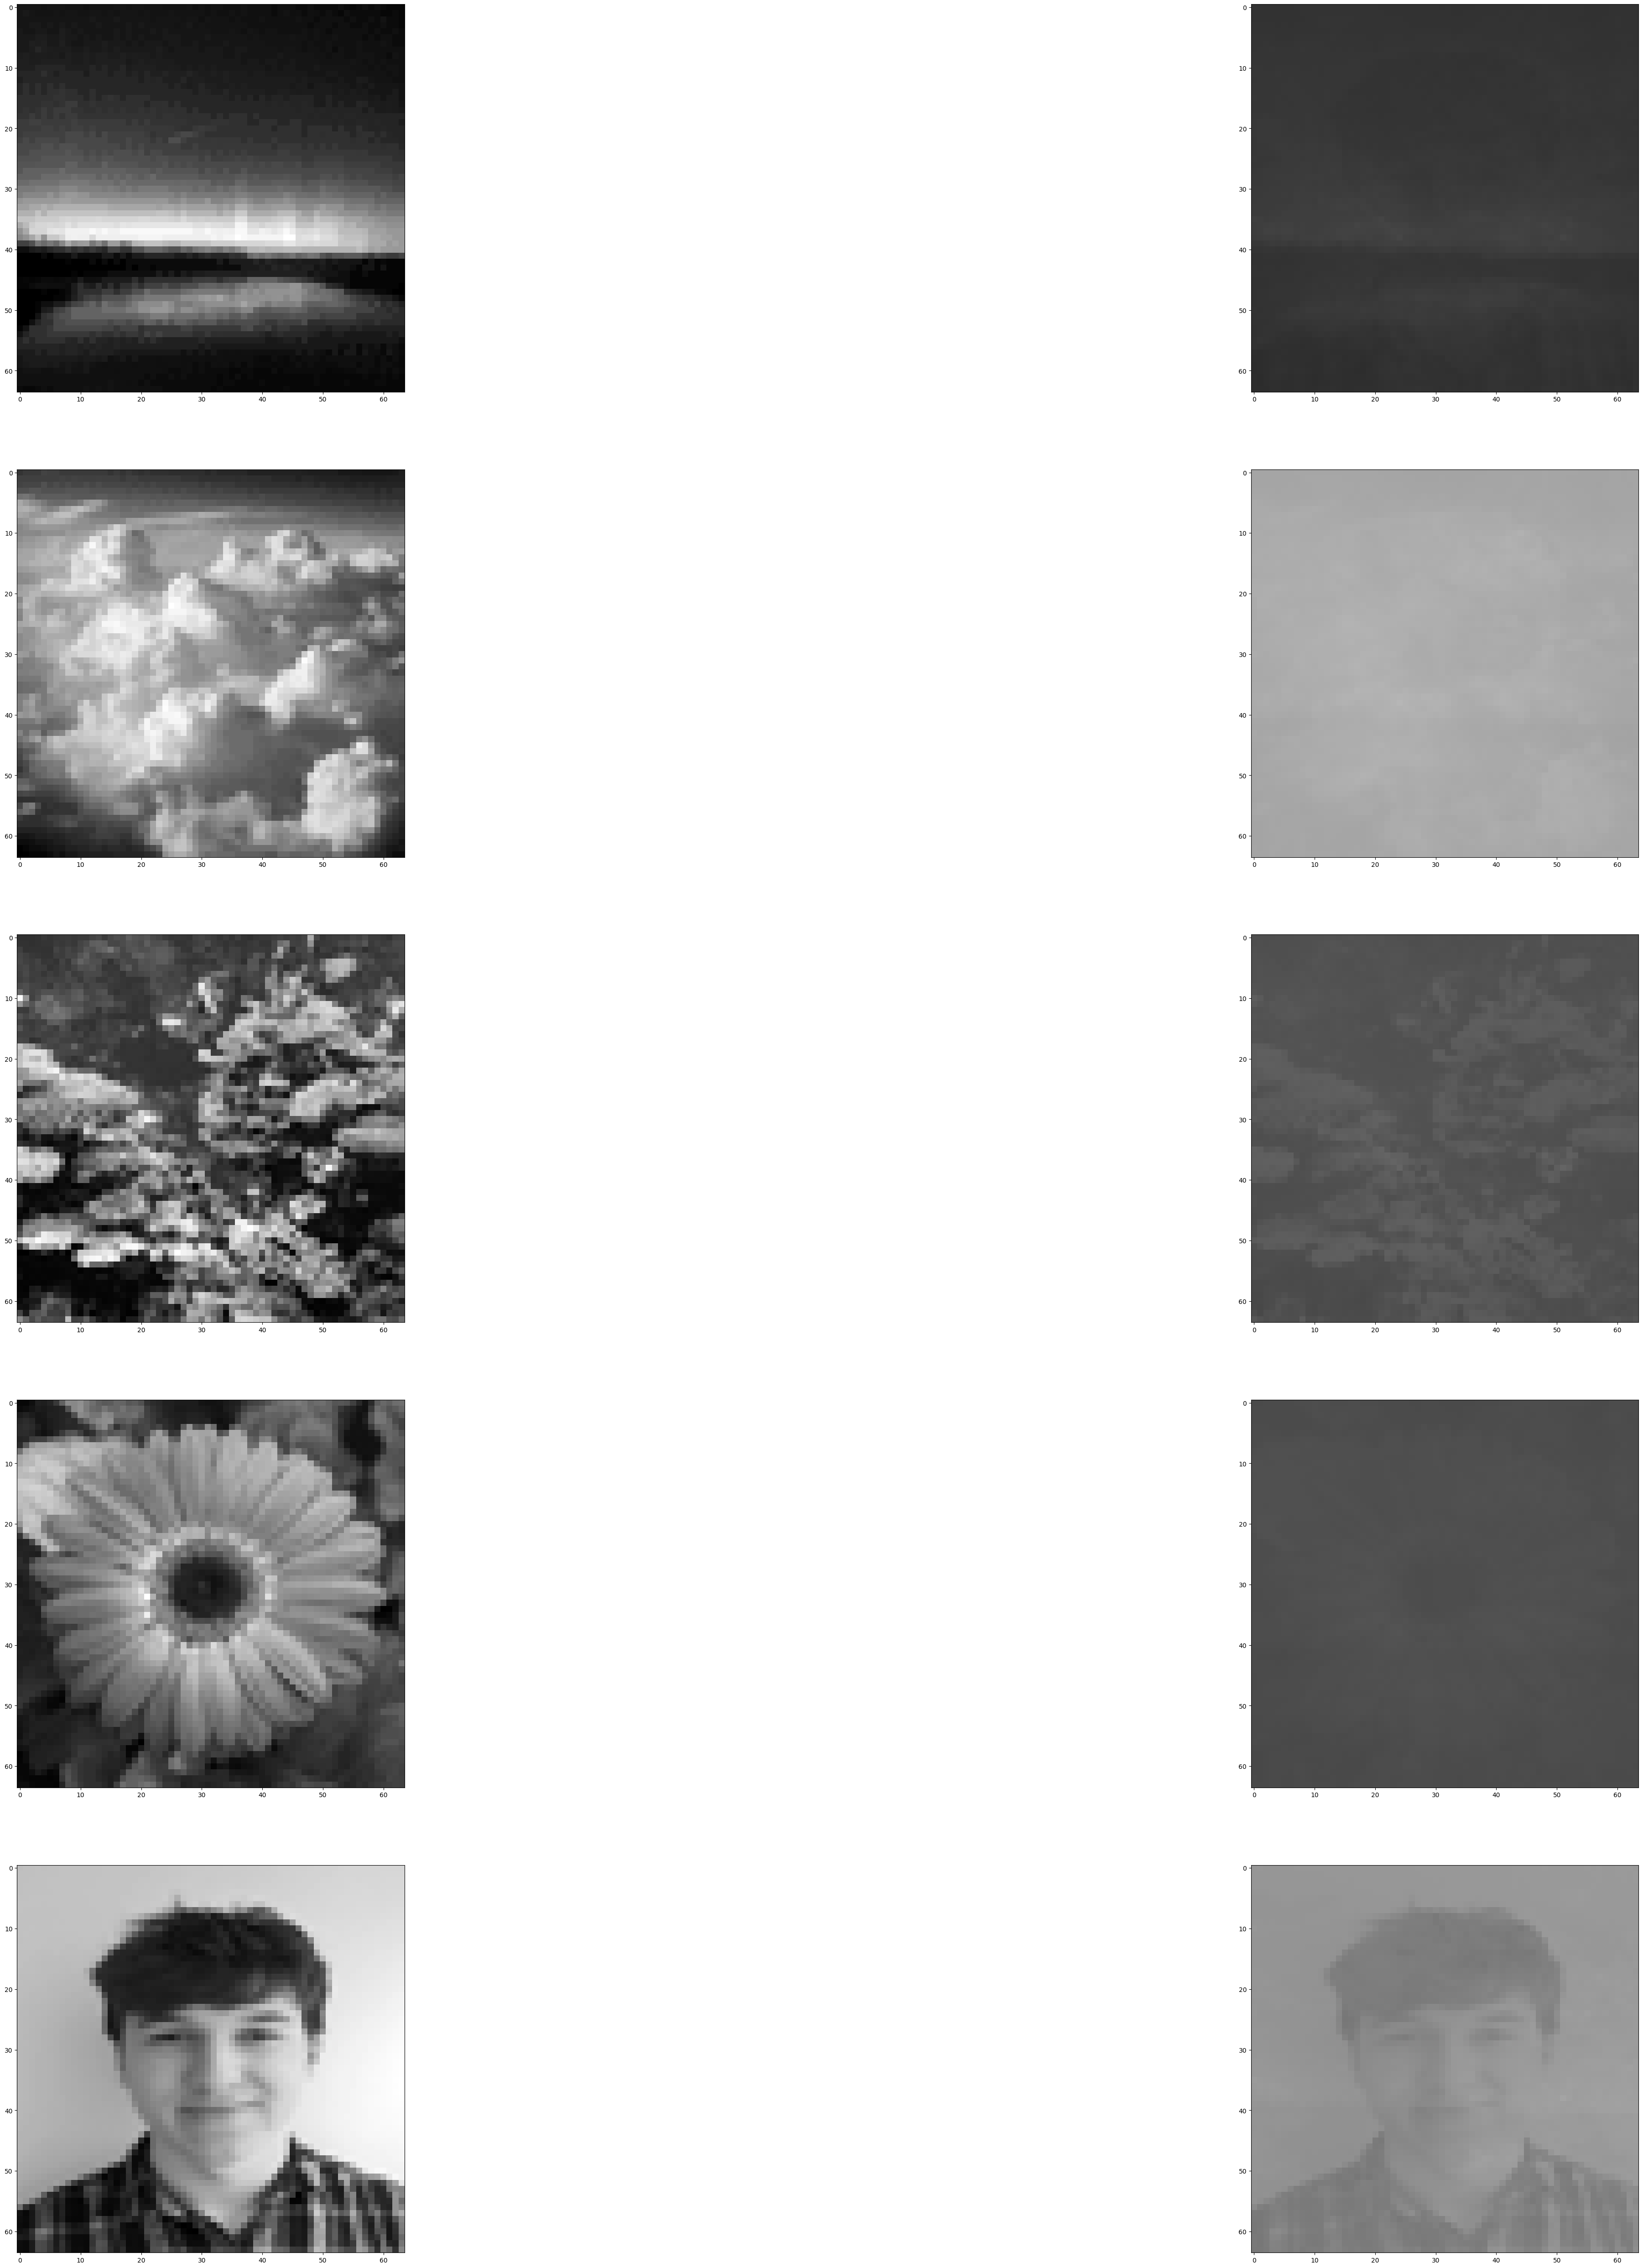

In [3]:
plt.figure(figsize=images[0].size)
for i in images:
    k = np.array(i).flatten()
    bits = np.pi * (k / 255)
    states = np.exp(1j* bits)

    outp = hopfield.update_sync(states)

    out = 255 * (abs(np.angle(outp)) / np.pi)
    outi = out.reshape(i.size[::-1])

    

    plt.subplot(5, 2, images.index(i) * 2 + 1)
    plt.imshow(i, cmap='gray')

    
    plt.subplot(5, 2, images.index(i) * 2 + 2)
    plt.imshow(Image.fromarray(outi))

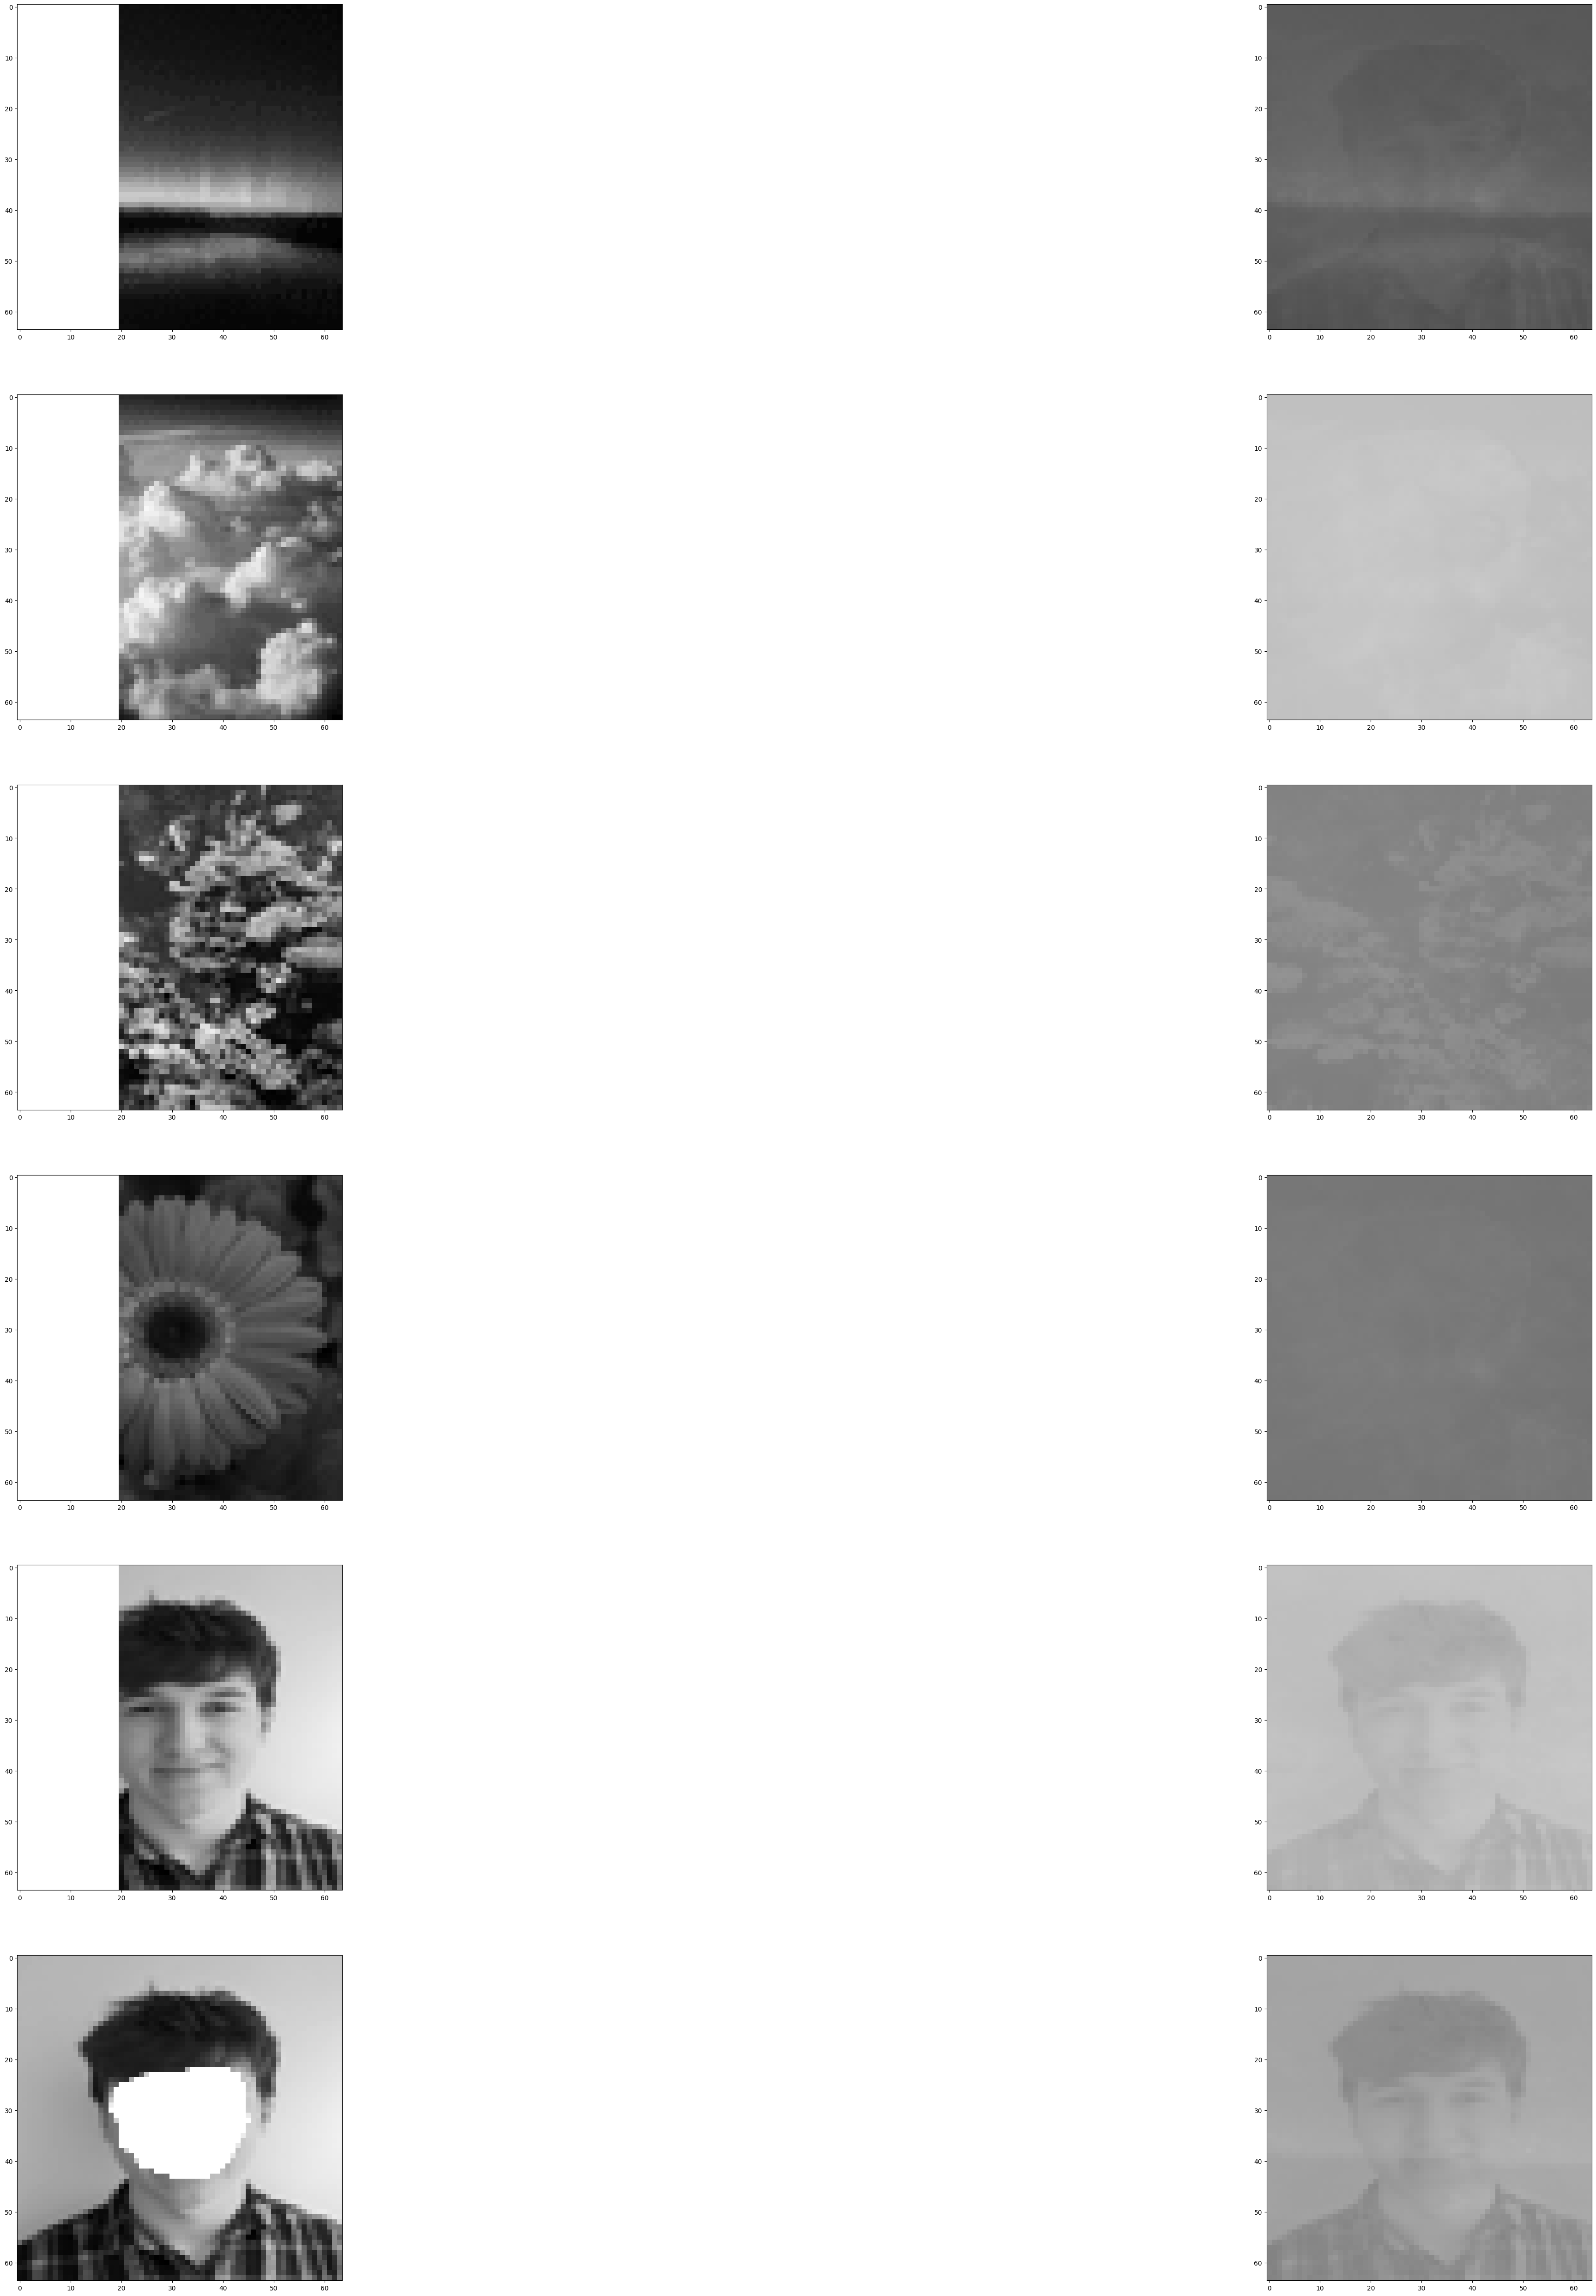

In [4]:
plt.figure(figsize=images[0].size)
cimages = []
for filename in os.listdir("sample/colour/corrupted"):
    cimages.append(Image.open(f"sample/colour/corrupted/{filename}").convert('L'))

for i in cimages:
    k = np.array(i).flatten()
    bits = np.pi * (k / 255)
    states = np.exp(1j* bits)

    outp = hopfield.update_sync(states)

    out = 255 * (abs(np.angle(outp)) / np.pi)
    outi = out.reshape(i.size[::-1])

    

    plt.subplot(6, 2, cimages.index(i) * 2 + 1)
    plt.imshow(i, cmap='gray')

    
    plt.subplot(6, 2, cimages.index(i) * 2 + 2)
    plt.imshow(Image.fromarray(outi))